In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import norm
from utils.arch.anomalies import shock_mean_fn, shock_volatility_fn
from depth.multivariate import simplicial, halfspace, simplicial, betaSkeleton
from utils.simulate_markov import simulate_arch_1_process, simulate_arch_1_process_with_shock_anomaly
from utils.markov_depth import calculate_markov_tukey_depth_using_long_trajectory, calculate_markov_tukey_depth_for_trajectories_using_long_trajectory, calculate_markov_depth
from utils.depth_functions import tukey_depth_depth_ar_1, tukey_depth_dimension_1
from utils.kernel_estimation import nadaraya_watson_marginal_pdf, nadaraya_watson_marginal_cdf, nadaraya_watson_marginal_cdf_direct, nadaraya_watson_average_marginal_cdf, nadaraya_watson_average_marginal_cdf_direct, nadaraya_watson_average_marginal_pdf
from utils.simulate_markov import simulate_ar1_process, NORMAL_NOISE, UNIFORM_NOISE

In [2]:
# Set up the Seaborn style
sns.set(style="whitegrid")

In [3]:
# Fix the random seed for reproducibility 
random_seed = 15
np.random.seed(random_seed)

In [4]:
# Number of steps on each trajectory
n_steps = 100
# Number of steps of the initial long trajectory.
# Used for the initial kernel estimation.
n_steps_long = n_steps*10
# Number of normal trajectories to simulate
M = 100
# Number of anomalous trajectories to simulate
A = 10

In [5]:
# Parameters of the ARCH(1) process
INITIAL_VALUE = 0.5

def mean_fn(x):
    return 1 / (1 + np.exp(-x))

def volatility_fn(x):
    return norm.pdf(x + 1.2) + 1.5 * norm.pdf(x - 1.2)

In [6]:
# Simulate a long ARCH(1) process, used to estimate the kernel
random_seed +=1
long_arch_trajectory = simulate_arch_1_process(
    n_steps=n_steps_long, 
    m=mean_fn, 
    sigma=volatility_fn, 
    initial_value=INITIAL_VALUE, 
    num_processes=1,
    seed=random_seed
)[0]

In [7]:
# Simulate  ARCH(1) processes
random_seed +=1
regular_arch_trajectories = simulate_arch_1_process(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=volatility_fn, 
    initial_value=INITIAL_VALUE, 
    num_processes=M, 
    seed=random_seed
)

In [8]:
# Simulate  ARCH(1) process
random_seed +=1
anomalous_shock_arch_trajectories = simulate_arch_1_process_with_shock_anomaly(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=volatility_fn, 
    anomalous_m=shock_mean_fn,
    anomalous_sigma=shock_volatility_fn,
    initial_value=INITIAL_VALUE, 
    num_processes=A, 
    anomaly_size=0.01,
    seed=random_seed,
)

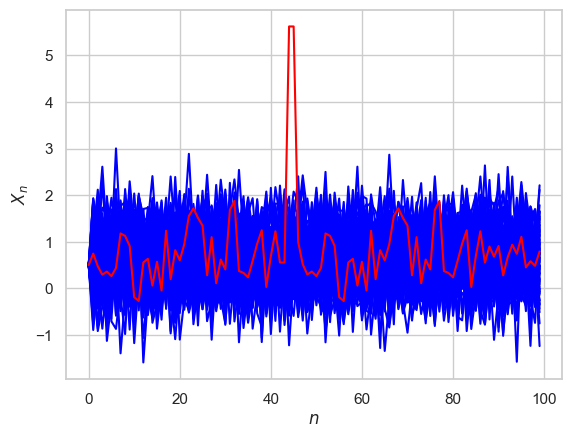

In [9]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_arch_trajectories):
    if i == 0:
        plt.plot(trajectory, color="blue", label="regular trajectories")
    else:
        plt.plot(trajectory, color="blue")

plt.plot(anomalous_shock_arch_trajectories[0], color="red", alpha=1)

# Plot anomalous trajectories
# for i, trajectory in enumerate(anomalous_shock_arch_trajectories):
#     if i == 0:
#         plt.plot(trajectory, color="red", label="anomalies", alpha=1)
#     else:
#         plt.plot(trajectory, color="red", alpha=1)
# plt.title("Regular and anomalous trajectories for the ARCH(1) model")
# plt.legend()
plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()